In [32]:
from radd import build
from radd.tools import theta

In [35]:
build=reload(build)
from radd import CORE
CORE=reload(CORE)

In [164]:
m = build.Model(data=redata, depends_on={'v':'Cond'}, fit_on='subjects', kind='xirace')

In [210]:
p = theta.random_inits(list(m.inits), kind='xirace')

In [211]:
p

{'a': array([ 0.57031]),
 'ssv': array([ 1.35253]),
 'tr': array([ 0.11787]),
 'v': array([ 1.14075]),
 'xb': array([ 2.25851])}

In [208]:
m.opt.simulator.cost_fx(p)

2.45895

In [160]:
dvg, dvs = m.opt.simulator.sim_fx(p, analyze=False)

In [212]:
m.opt.simulator.sim_fx(p)

array([ 1.     ,  0.0154 ,  0.0145 ,  0.0147 ,  0.0139 ,  0.0151 ,
        0.46287,  0.46787,  0.48287,  0.48787,  0.50787,  0.46287,
        0.46787,  0.48287,  0.48787,  0.50787])

In [6]:
m.set_fitparams(ntrials=10000, tol=1e-2)
m.set_basinparams(nrand_inits=1, nrand_samples=5, tol=1e-2, niter=25)

In [7]:
m.optimize()

default inits: fmin0=0.004184600
basinhopping step 0: f 0.0644458
basinhopping step 1: f 0.0644458 trial_f 0.355686 accepted 0  lowest_f 0.0644458
basinhopping step 2: f 0.0161517 trial_f 0.0161517 accepted 1  lowest_f 0.0161517
found new global minimum on step 2 with function value 0.0161517
basinhopping step 3: f 0.0325967 trial_f 0.0325967 accepted 1  lowest_f 0.0161517
basinhopping step 4: f 0.061899 trial_f 0.061899 accepted 1  lowest_f 0.0161517
adaptive stepsize: acceptance rate 0.600000 target 0.500000 new stepsize 0.0666667 old stepsize 0.06
basinhopping step 5: f 0.0216573 trial_f 0.0216573 accepted 1  lowest_f 0.0161517
basinhopping step 6: f 0.25716 trial_f 0.25716 accepted 1  lowest_f 0.0161517
basinhopping step 7: f 0.305478 trial_f 0.305478 accepted 1  lowest_f 0.0161517
basinhopping step 8: f 0.385212 trial_f 0.385212 accepted 1  lowest_f 0.0161517
basinhopping step 9: f 0.0504229 trial_f 0.0504229 accepted 1  lowest_f 0.0161517
adaptive stepsize: acceptance rate 0.8000

ValueError: total size of new array must be unchanged

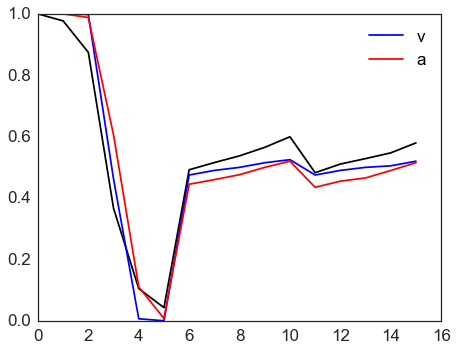

In [62]:
wts = array([2.053212, 2.053212, 0.997414, 0.606937, 1.001222, 0.998781, 2.842958, 3.627192, 2.899293, 2.315159, 1.834140, 0.646090, 0.911996, 0.882270, 0.770639, 0.674956])

yhat_v = array([1.000000, 1.000000, 0.998125, 0.461775, 0.006475, 0.000100, 0.475000, 0.490000, 0.500000, 0.515000, 0.525000, 0.475000, 0.490000, 0.500000, 0.505000, 0.520000])
yhat_a = array([0.999997, 1.000000, 0.988325, 0.605450, 0.110525, 0.007525, 0.445000, 0.460000, 0.476000, 0.500000, 0.520000, 0.435000, 0.455000, 0.465500, 0.489750, 0.515000])

y = array([1.000000, 0.977167, 0.874667, 0.366500, 0.105000, 0.042833, 0.492099, 0.515540, 0.537509, 0.565189, 0.599662, 0.482489, 0.510730, 0.528512, 0.547180, 0.579663])
plt.plot(y, color='k')
plt.plot(yhat_v, label='v', color= 'b')
plt.plot(yhat_a, label='a', color= 'r')
plt.legend(loc=0)

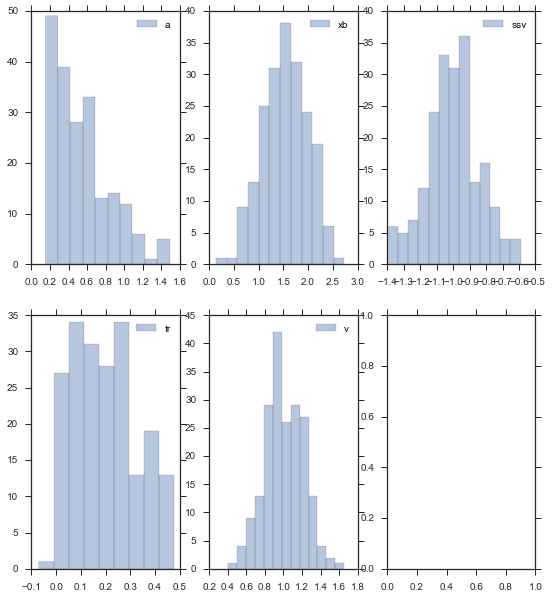

In [53]:
f, axes = plt.subplots(2, 3, figsize=(10,10))
axes = np.asarray(axes).flatten()
i = 0
for pk, pv in pinits.items():
    sns.distplot(pinits[pk], label=pk, kde=False, ax=axes[i])
    i+=1
for ax in axes:
    ax.legend(loc=0)

In [ ]:
""" simulate stochastic decision process with upper bound 
        ::Arguments::
            p (dict): vectorized params dictionary 
            Pg (array): P(+dx) determined by drift-rate, scaled by dx/si
            Tg (array): number of timepoints to simulate (determined by timebound, tb)
            xtb (array):
            dx (float): stepsize of decision process 
            tb (float): timewindow of trial in seconds
            nl (int): number of levels across all conditions (index 0 of returned vector)
            ntot (int): total number of trials to estimate per level per condition
        ::Returns::
            numpy array of decision traces (nlevels x ntot x Tg.max())
        """